# Assignment 1
# Name : Ekanyaka S.D.
# Index No : 190162F


## Question 1

For given intensity transform can obtain by concatenate three well defined ranges and then apply cv.LUT to assigns new pixel values to each pixel in the input image according to the values given by Intensity transform. When we compare this two images we can clearly see that the more white color in area arround the middle of the image.Because the intensity transformation is applied to the mid range of the image and it causes to have more white arround the middle area of the image.

Text(0.5, 1.0, 'Transformed_Image')

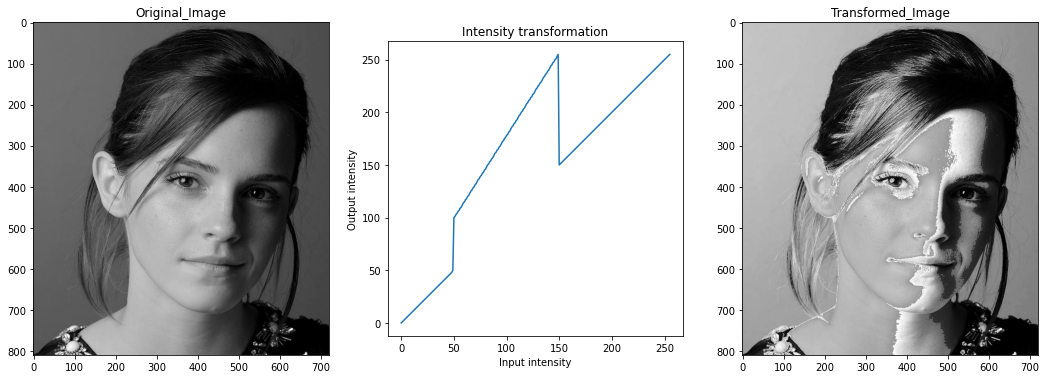

In [50]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline

img=cv.imread(r'emma_gray.jpg') # open image
assert img is not None

# make the transform ranges
range1=np.linspace(0,50,50)
range2=np.linspace(100,255,100)
range3=np.linspace(150,255,106)

# combine all the ranges to a single array
transform=np.concatenate((range1,range2,range3),axis=0).astype(np.uint8)

fig,ax=plt.subplots(1,3,figsize=(18,18))
ax[0].imshow(img)
ax[0].set_title('Original_Image')
ax[1].plot(transform)
ax[1].set_aspect('equal')
ax[1].set_title('Intensity transformation')
ax[1].set_xlabel('Input intensity')
ax[1].set_ylabel('Output intensity')
assert len(transform)==256

# perform the intensity transformation on the image
img_new=cv.LUT(img,transform)
ax[2].imshow(cv.cvtColor(img_new,cv.COLOR_BGR2RGB))
ax[2].set_title('Transformed_Image')

# Question 3

Gamma correction controls the overall brightness of an image. Images which are not properly corrected can look either bleached out, or too dark.Varying the amount of gamma correction changes not only the brightness, but also the ratios of red to green to blue.

Text(0.5, 1.0, 'Histogram_of_Corrected_Image (Gamma - 0.6)')

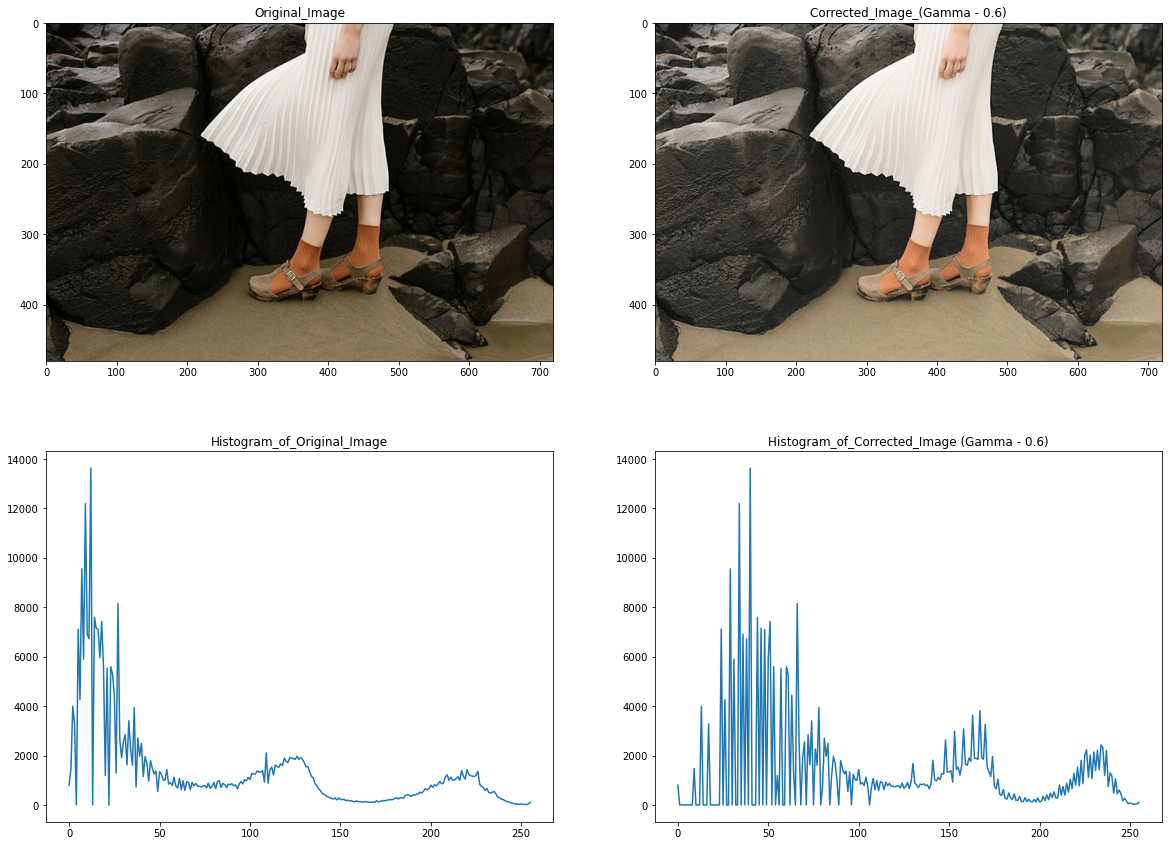

In [86]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline

img=cv.imread(r'highlights_and_shadows.jpg') # open image
assert img is not None

Lab_img=cv.cvtColor(img,cv.COLOR_BGR2LAB)
gamma=0.6
transform=np.array([(p/255)**gamma*255 for p in range(0,256)]).astype(np.uint8)
L,a,b=cv.split(Lab_img)
l_T_img=cv.LUT(L,transform)
new_img=img.copy()
new_img[:,:,0]=l_T_img
new_img[:,:,1]=Lab_img[:,:,1]
new_img[:,:,2]=Lab_img[:,:,2]

fig,ax=plt.subplots(2,2,figsize=(20,15))
ax[0][0].imshow(cv.cvtColor(Lab_img,cv.COLOR_LAB2RGB))
ax[0][0].set_title('Original_Image')
ax[0][1].imshow(cv.cvtColor(new_img,cv.COLOR_LAB2RGB))
ax[0][1].set_title('Corrected_Image_(Gamma - {})'.format(gamma))

hist_Lab_img=cv.calcHist([Lab_img],[0],None,[256],[0,256])
hist_new_img=cv.calcHist([new_img],[0],None,[256],[0,256])
ax[1][0].plot(hist_Lab_img)
ax[1][0].set_title('Histogram_of_Original_Image')
ax[1][1].plot(hist_new_img)
ax[1][1].set_title('Histogram_of_Corrected_Image (Gamma - {})'.format(gamma))

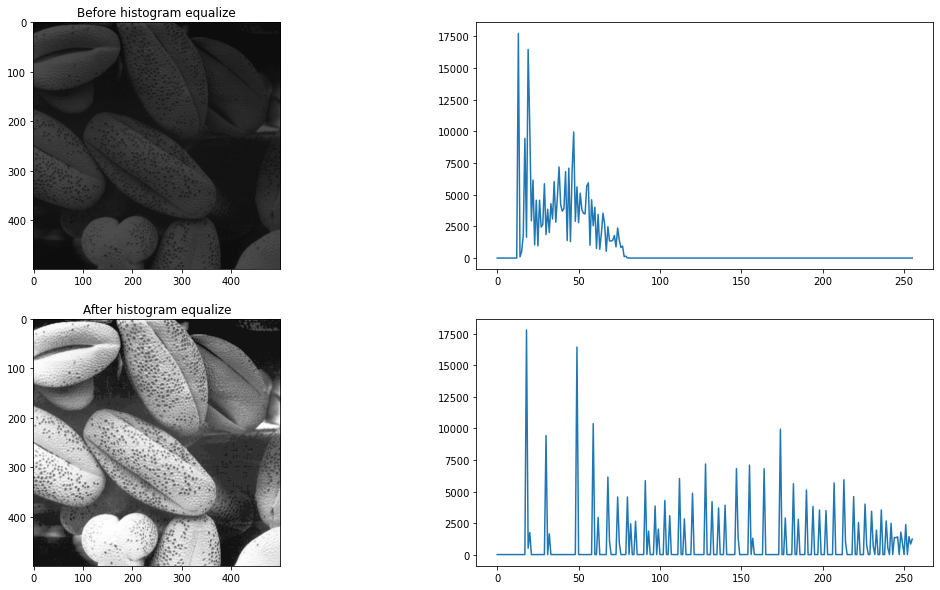

In [87]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline

ImgN=cv.imread(r'shells.png',cv.IMREAD_GRAYSCALE) # open image
assert ImgN is not None

intensity_nk=np.zeros((256,1))
L=256
for j in range(L):
    px=0
    for row in ImgN:
        px+=np.count_nonzero(row == j)
    intensity_nk[j]=[px]
    
equalizer=intensity_nk.copy()
MN=len(ImgN)*len(ImgN[0])

#calculate cummulative sum

count=0
cum_sum=0
while count<len(equalizer):
    cum_sum+=equalizer[count][0]
    equalizer[count][0]=int(round(cum_sum*(L-1)/MN))
    count+=1
    
Img_newN=ImgN.copy()
for m in range(len(Img_newN)):
    for n in range(len(Img_newN[m])):
        Img_newN[m][n]=equalizer[Img_newN[m][n]][0]

equalizer_hist=np.zeros((256,1))
for k in range(L):
    pk=0
    for row in Img_newN:
        pk+=np.count_nonzero(row == k)
    equalizer_hist[k]=[pk]
    
fig,ax=plt.subplots(2,2,figsize=(18,10))

ax[0][0].imshow(cv.cvtColor(ImgN, cv.COLOR_BGR2RGB))
ax[0][0].set_title('Before histogram equalize')
ax[0][1].plot(intensity_nk)

ax[1][0].imshow(cv.cvtColor(Img_newN, cv.COLOR_BGR2RGB))
ax[1][0].set_title('After histogram equalize')
ax[1][1].plot(equalizer_hist)

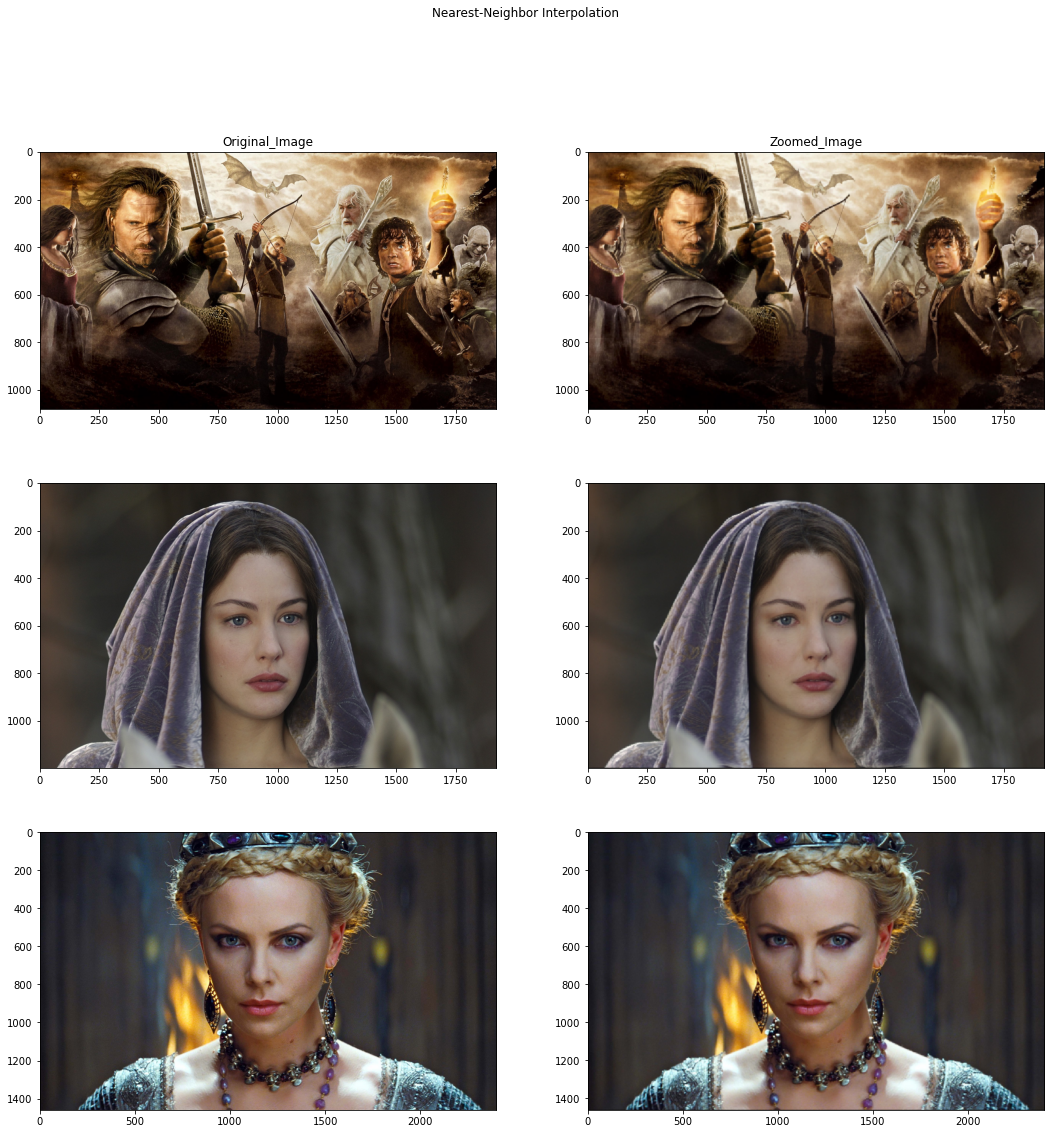

In [88]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

def ssd(image1,image2):
    ssd=0
    (h,w)=image1.shape[:2]
    defaul=0
    for i in range(h):
        defaul+=(np.subtract(image1[i],image2[i]))
    for j in range(len(defaul)):
        ssd+=((defaul[j])**2)
    return ssd
def zoomed(image,s,method):
    rows_zoomed=image.shape[0]*s
    cols_zoomed=image.shape[1]*s
    if (0<s<=10):
        if (method == 'NN'):#choose nearest neibour method
            image_zoomed=np.zeros((rows_zoomed,cols_zoomed,3),dtype=image.dtype)
            for i in range(rows_zoomed-1):
                for j in range(cols_zoomed-1):
                    z_x=int(round(i/s))#round and take int value
                    z_y=int(round(j/s))
                    if z_x>=image.shape[0]:
                        z_x=image.shape[0]-1#check boundry condition
                    if z_y>=image.shape[1]:
                        z_y=image.shape[1]-1
                    image_zoomed[i][j]=image[z_x][z_y]
            return image_zoomed
        else:
            image_zoomed=np.zeros((rows_zoomed,cols_zoomed,3),dtype=image.dtype)
            for i in range(rows_zoomed-1):
                for j in range(cols_zoomed-1):
                    z_x=(i/s)
                    z_y=(j/s)
                    l_t_value,l_b_value = [math.floor(z_x),math.floor(z_y)],[math.ceil(z_x),math.floor(z_y)]#get all possible points to calculate binary inperpolation
                    r_t_value,r_b_value = [math.floor(z_x),math.ceil(z_y)],[math.ceil(z_x),math.ceil((z_y))]
                    if l_b_value[0]>=image.shape[0]:
                        l_b_value[0] = image.shape[0]-1
                        r_b_value[0] = image.shape[0]-1
                    if r_b_value[1] >= image.shape[1]:
                        r_t_value[1] = image.shape[1]-1
                        r_b_value[1] = image.shape[1]-1
                    
                    vertical_ratio = z_x-math.floor(z_x)
                    horizontal_ratio = z_y-math.floor(z_y)
                    new_x = image[l_t_value[0]][l_t_value[1]]*(1-vertical_ratio)+image[l_b_value[0]][l_b_value[1]]*vertical_ratio
                    new_y = image[r_t_value[0]][r_t_value[1]]*(1-vertical_ratio)+image[r_b_value[0]][r_b_value[1]]*vertical_ratio
                    
                    image_zoomed[i][j]=np.rint(new_x*(1-horizontal_ratio)+new_y*horizontal_ratio)
            return image_zoomed
                    
        
        
        

img1=cv.imread(r'a1q5images/im01small.png',cv.COLOR_BGR2RGB)# open small image1
assert img1 is not None
img2=cv.imread(r'a1q5images/im02small.png',cv.COLOR_BGR2RGB) # open small image2
assert img2 is not None
img3=cv.imread(r'a1q5images/im03small.png',cv.COLOR_BGR2RGB) # open small image3
assert img3 is not None

img1_org=cv.imread(r'a1q5images/im01.png',cv.COLOR_BGR2RGB) # open image1
assert img1_org is not None
img2_org=cv.imread(r'a1q5images/im02.png',cv.COLOR_BGR2RGB) # open image2
assert img2_org is not None
img3_org=cv.imread(r'a1q5images/im03.png',cv.COLOR_BGR2RGB) # open image3
assert img3_org is not None

img1_zoomed_NN=zoomed(img1,4,'NN')
img2_zoomed_NN=zoomed(img2,4,'NN')
img3_zoomed_NN=zoomed(img3,4,'NN')

img1_zoomed_BL=zoomed(img1,4,'BL')
img2_zoomed_BL=zoomed(img2,4,'BL')
img3_zoomed_BL=zoomed(img3,4,'BL')

fig,ax=plt.subplots(3,2,figsize=(18,18))
fig.suptitle('Nearest-Neighbor Interpolation')
ax[0][0].imshow(cv.cvtColor(img1_org,cv.COLOR_BGR2RGB))
ax[0][0].set_title('Original_Image')
ax[0][1].imshow(cv.cvtColor(img1_zoomed_NN,cv.COLOR_BGR2RGB))
ax[0][1].set_title('Zoomed_Image')
ax[1][0].imshow(cv.cvtColor(img2_org,cv.COLOR_BGR2RGB))
ax[1][1].imshow(cv.cvtColor(img2_zoomed_NN,cv.COLOR_BGR2RGB))
ax[2][0].imshow(cv.cvtColor(img3_org,cv.COLOR_BGR2RGB))
ax[2][1].imshow(cv.cvtColor(img3_zoomed_NN,cv.COLOR_BGR2RGB))




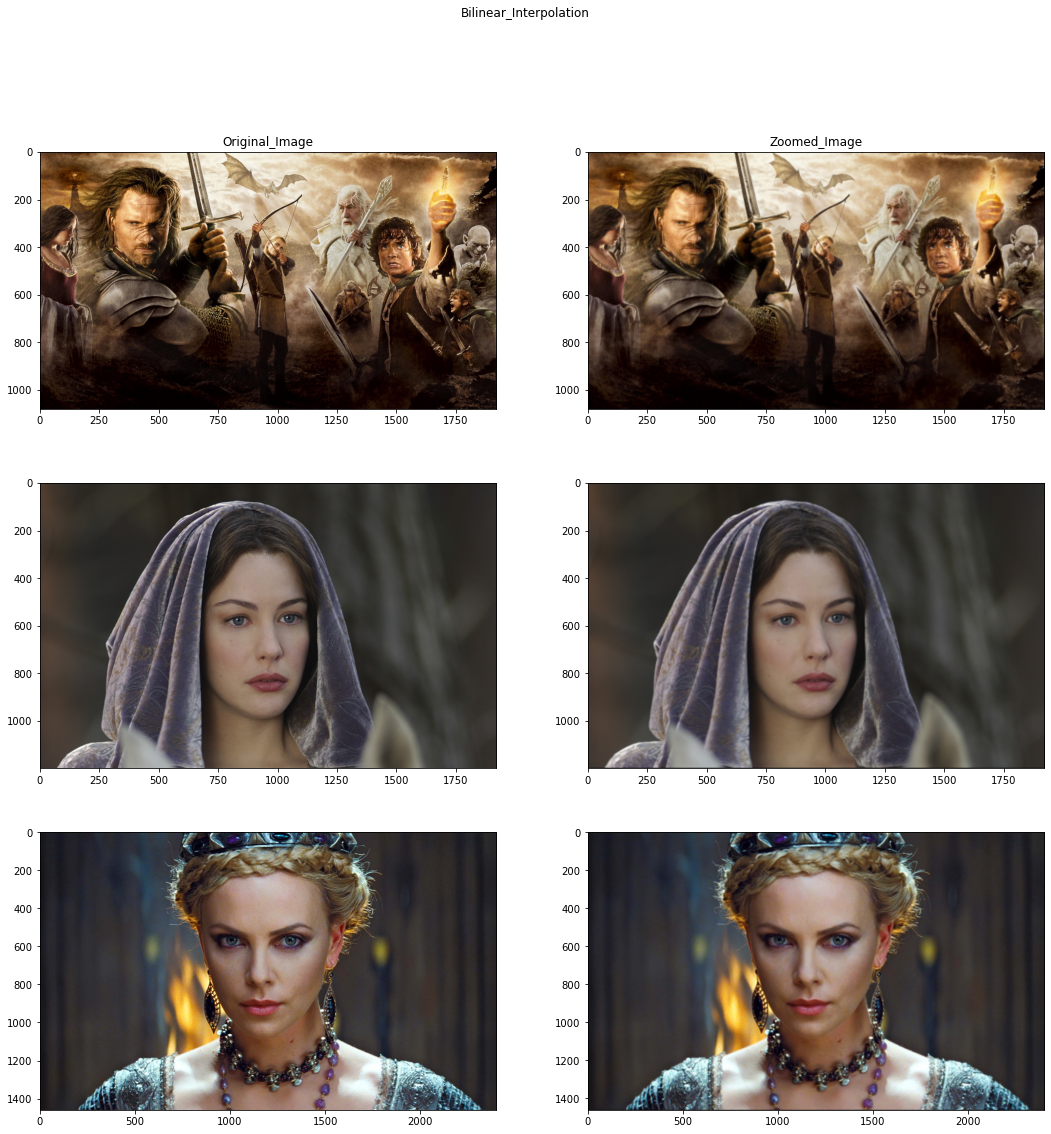

In [89]:
fig,ax=plt.subplots(3,2,figsize=(18,18))
fig.suptitle('Bilinear_Interpolation')
ax[0][0].imshow(cv.cvtColor(img1_org,cv.COLOR_BGR2RGB))
ax[0][0].set_title('Original_Image')
ax[0][1].imshow(cv.cvtColor(img1_zoomed_BL,cv.COLOR_BGR2RGB))
ax[0][1].set_title('Zoomed_Image')
ax[1][0].imshow(cv.cvtColor(img2_org,cv.COLOR_BGR2RGB))
ax[1][1].imshow(cv.cvtColor(img2_zoomed_BL,cv.COLOR_BGR2RGB))
ax[2][0].imshow(cv.cvtColor(img3_org,cv.COLOR_BGR2RGB))
ax[2][1].imshow(cv.cvtColor(img3_zoomed_BL,cv.COLOR_BGR2RGB))

In [90]:
SSD_NN=np.sum((img1_org[:,:,0:3]-img1_zoomed_NN[:,:,0:3])**2)
SSD_BL=np.sum((img1_org[:,:,0:3]-img1_zoomed_BL[:,:,0:3])**2)

print('SSD for nearest-neighbor interpolation:',SSD_NN)
print('SSD for bilinear interploation:',SSD_BL)

SSD for nearest-neighbor interpolation: 249973376
SSD for bilinear interploation: 245221594


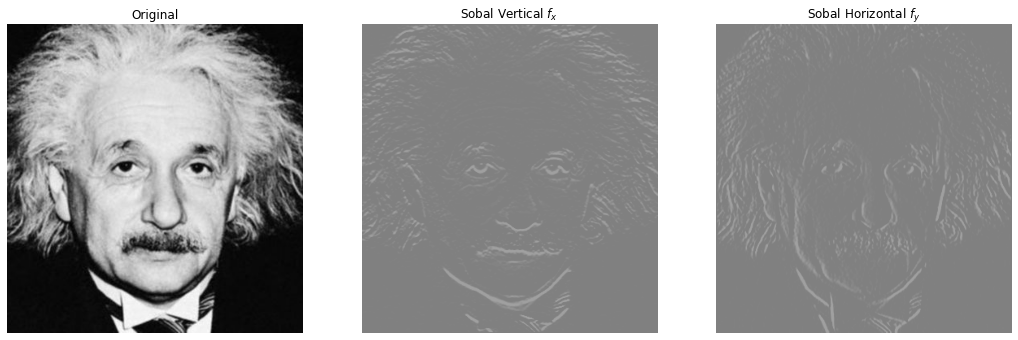

In [17]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline

image=cv.imread(r'einstein.png',cv.IMREAD_GRAYSCALE) # open image
assert image is not None

sobel_verticle=np.array([(-1,-2,-1),(0,0,0),(1,2,1)] ,dtype= 'float')
sobel_horizontal=np.array([(-1,0,1),(-2,0,2),(-1,0,1)] ,dtype= 'float')

image_vert_x = cv.filter2D(image,-1,sobel_verticle)
image_horiz_y = cv.filter2D(image,-1,sobel_horizontal)

fig,ax=plt.subplots(1,3,figsize=(18,6))
ax[0].imshow(image,cmap='gray',vmin=0,vmax=255)
ax[0].set_title('Original')

ax[1].imshow(image_vert_x,cmap='gray',vmin=-1020,vmax=1020)
ax[1].set_title(r'Sobal Vertical $f_x$')

ax[2].imshow(image_horiz_y,cmap='gray',vmin=-1020,vmax=1020)
ax[2].set_title(r'Sobal Horizontal $f_y$')

for i in range(3):
    ax[i].axis('off')

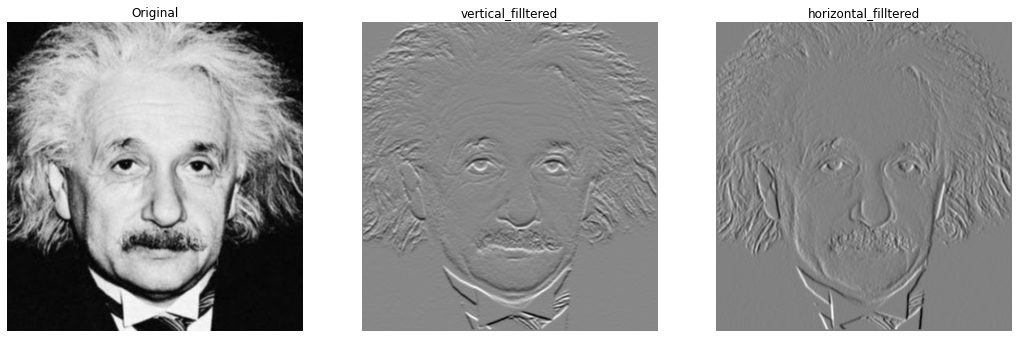

In [14]:
%matplotlib inline  
import cv2 as cv 
import matplotlib . pyplot as plt 
import numpy as np 
import math 
def sobal_filter (image , kernel) : 
    
    i=1
    j=1
    kernal_h=math.floor(kernel.shape[0]/2)
    if len(kernel.shape)==1:
        kernal_w=0
        j=2
    else:
        kernal_w=math.floor(kernel.shape[1]/2)
        if kernel.shape[1]==1:
            j=2
    if kernel.shape[0]==1:
        i=2
    
    h, w = image.shape 
    
    result = np.zeros(image.shape , float) 
    for m in range(kernal_h , h-kernal_h-i) : 
        for n in range( kernal_w, w- kernal_w-j) : 
            result [ m , n ] = np.dot(image [m-kernal_h:m +kernal_h + 1 , n- kernal_w : n +  kernal_w + 1]. flatten () , kernel . flatten () ) 
    return result 

  
f , axarr = plt . subplots (1,3,figsize=(18,6))
axarr[0].imshow(image, cmap="gray", vmin=0,vmax=255) 
axarr[0]. set_title ( 'Original')  
vert_filltered=sobal_filter(image,sobel_verticle)

axarr[1].imshow(vert_filltered, cmap="gray")
axarr[1]. set_title ( 'vertical_filltered')
horiz_filltered=sobal_filter(image,sobel_horizontal)  
axarr[2].imshow(horiz_filltered, cmap="gray")
axarr[2]. set_title ( 'horizontal_filltered')

for i in range(3):
    axarr[i].axis('off')

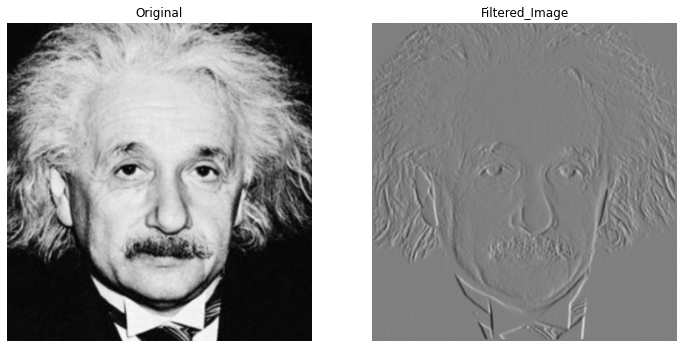

In [19]:
arr1=np.array([(1),(2),(1)] ,dtype= 'float')
arr2=np.array([(1,0,-1)] ,dtype= 'float')

arr1_image_filltered=sobal_filter(image,arr2)
image_final=sobal_filter(arr1_image_filltered,arr1)

fig,ax=plt.subplots(1,2,figsize=(12,10))
ax[0].imshow(image,cmap='gray',vmin=0,vmax=255)
ax[0].set_title('Original')

ax[1].imshow(image_final,cmap='gray',vmin=-1020,vmax=1020)
ax[1].set_title(r'Filtered_Image')

for i in range(2):
    ax[i].axis('off')

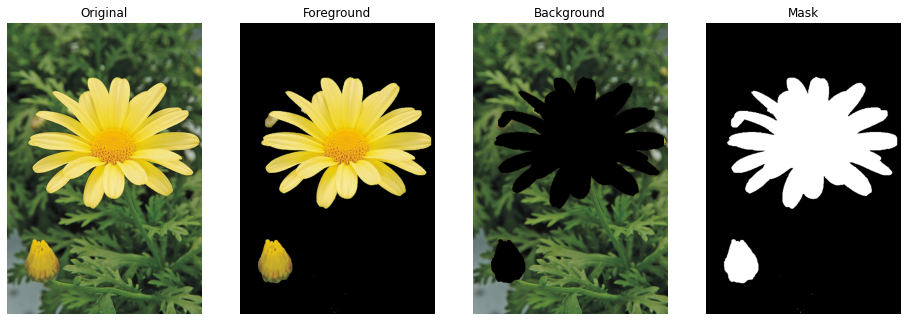

In [45]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
%matplotlib inline

image = cv.imread(r'daisy.jpg',cv.COLOR_RGB2BGR)
mask = np.zeros(img.shape[:2],np.uint8)
B_G_Model = np.zeros((1,65),np.float64)
F_G_Model = np.zeros((1,65),np.float64)

rectangle = (50,50,500,800)

cv.grabCut(image,mask,rectangle,B_G_Model,F_G_Model,5,cv.GC_INIT_WITH_RECT)
mask1 = np.where((mask==2)|(mask==0),0,1).astype('uint8')

image_FG = image*mask1[:,:,np.newaxis]
image_BG=np.subtract(image,image_FG)

fig,ax=plt.subplots(1,4,figsize=(16,12))
ax[0].imshow(cv.cvtColor(image,cv.COLOR_BGR2RGB))
ax[0].set_title('Original')

ax[1].imshow(cv.cvtColor(image_FG,cv.COLOR_BGR2RGB))
ax[1].set_title(r'Foreground')

ax[2].imshow(cv.cvtColor(image_BG,cv.COLOR_BGR2RGB))
ax[2].set_title(r'Background')

ax[3].imshow(cv.cvtColor(mask1*255,cv.COLOR_BGR2RGB))
ax[3].set_title(r'Mask')

for i in range(4):
    ax[i].axis('off')

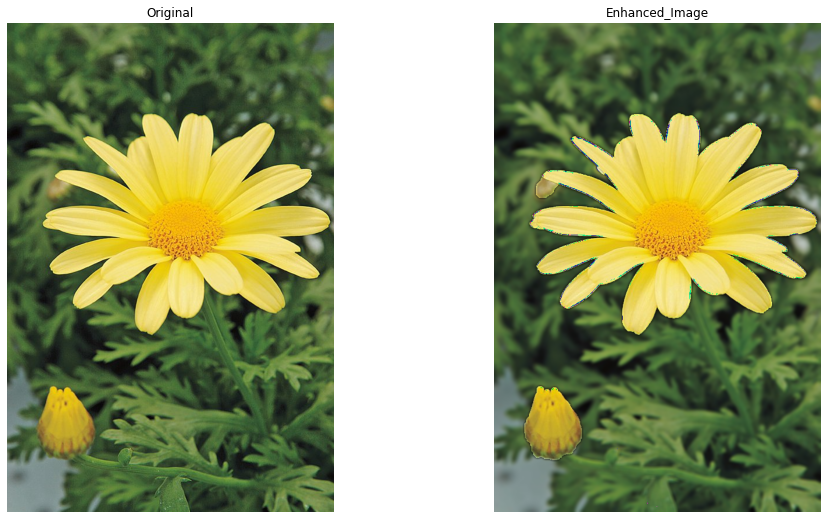

In [49]:
ksize=7
sigma=3
img_gaussian=cv.GaussianBlur(img_bg,(ksize,ksize),sigma)

img_enhanced=np.add(img_fg,img_gaussian)

fig,axs=plt.subplots(1,2,figsize=(16,9))
axs[0].imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB))
axs[0].set_title('Original')

axs[1].imshow(cv.cvtColor(img_enhanced,cv.COLOR_BGR2RGB))
axs[1].set_title(r'Enhanced_Image')

for i in range(2):
    axs[i].axis('off')